# Ordered phases in rydberg systems

In this example notebook, we will introduce the ordered phases in Rydberg systems, with focus on the 1D $Z_2$ phase and the 2D checkerboard phase.

## Introduction of Rydberg Hamiltonian


## Adiabatic evolution

We begin by importing the necessary packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from braket.ahs.atom_arrangement import AtomArrangement

from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation

from utils import show_register, show_global_drive, show_final_avg_density, get_drive

from braket.devices import LocalSimulator

## 1D $Z_2$ phase 

Here we consider a 1D chain of 9 atoms with neighboring atoms separated by $5.5\mu m$. The setup of the system can be generated as follows

In [ ]:
# spacingRadialMin = 4e-6,
# spacingVerticalMin = 2.5e-6,
# positionResolution = 0.1e-6,
# numberSitesMax = 100,
                
# rabiFrequencyMin = 0.0,
# rabiFrequencyMax = 6.30e6,
# rabiFrequencyResolution = 400.0,
# rabiFrequencySlewRateMax = 2.5e14,
# detuningMin = -125.0e6,
# detuningMax = 125.0e6,
# detuningResolution = 0.2,
# detuningSlewRateMax = 2.5e15,
# phaseMin = -99.0,
# phaseMax = 99.0,
# phaseResolution = 0.5e-6,
# phaseSlewRateMax = 62.0e6,
# timeMin = 0.0,
# timeMax = 4e-6,
# timeResolution = 1e-9,
# timeDeltaMin = 10e-9,


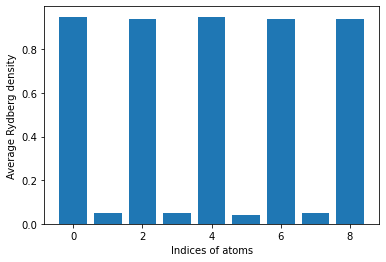

In [52]:
register = AtomArrangement()
separation = 5.5e-6  # in meters 
num_atoms = 9

for k in range(num_atoms):
    register.add((k*separation, 0))
    
# amplitude_min = 0
# amplitude_max = 12.6e6
# detuning_min = -24e6
# detuning_max = 60e6

amplitude_min = 0
amplitude_max = 6.3e6
detuning_min = -12e6
detuning_max = 30e6

time_max = 4e-6
time_ramp = 5e-7

time_points = [0, time_ramp, time_max - time_ramp, time_max]
amplitude_values = [amplitude_min, amplitude_max, amplitude_max, amplitude_min]
detuning_values = [detuning_min, detuning_min, detuning_max, detuning_max]
phase_values = [0, 0, 0, 0]


drive = get_drive(time_points, amplitude_values, detuning_values, phase_values)


ahs_program = AnalogHamiltonianSimulation(
    register=register, 
    hamiltonian=drive
)

device = LocalSimulator("braket_ahs")
result = device.run(ahs_program, shots=100, steps=100, solver="non-qutip").result()
show_final_avg_density(result)